<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layer

In [56]:
from tensorflow.keras.layers import Dense, Layer, BatchNormalization, Dropout, concatenate
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import tensorflow.keras as keras

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
dense = Dense(10)

In [3]:
bn = BatchNormalization()

In [4]:
isinstance(dense, Layer)

True

In [5]:
# importante! settando questo attributo a False i suoi pesi non vengono aggiornati col gradient descent
dense.trainable

True

In [6]:
dense.variables

[]

In [7]:
dense.name

'dense'

In [8]:
dense.input

AttributeError: ignored

In [ ]:
dense.output

In [ ]:
# inizializzazione dei pesi tramite build

In [ ]:
dense = Dense(10)

In [ ]:
dense.build((100,))

In [ ]:
dense.trainable_variables

In [ ]:
# settare l'inizializzazione

In [ ]:
dense = Dense(10, kernel_initializer='glorot_normal')

In [ ]:
dense = Dense(10, kernel_initializer=keras.initializers.GlorotNormal(seed=1))

In [9]:
# inizializzazione mediante call

In [10]:
dense = Dense(10)

In [11]:
dense(np.random.rand(10, 45))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[ 0.40863147,  0.3696933 , -0.6596846 ,  0.50581634, -1.4205526 ,
        -0.4690498 ,  0.51373285,  0.12766536, -0.27731356, -0.1728231 ],
       [ 0.6367196 , -0.33463746, -1.05244   ,  0.33957735, -0.59018356,
        -0.6941351 ,  0.43956912,  0.36297306,  0.00911636, -0.485493  ],
       [ 0.81996673,  0.04043749, -0.30221382,  0.7183089 , -1.1824025 ,
        -0.1824894 ,  0.16708674,  0.08998964,  0.6520113 , -0.8433162 ],
       [ 0.9657036 , -0.08747502, -0.6347674 ,  1.2192343 , -1.4635628 ,
        -0.7460784 ,  0.25156698,  0.659677  ,  0.07349199, -0.64334124],
       [ 0.7409846 ,  0.5699152 , -1.4254822 ,  0.18088615, -1.4420223 ,
        -0.20210978,  0.80298644,  0.5817158 ,  1.1186259 , -0.60090315],
       [ 0.8329769 ,  0.55911165, -0.6165088 ,  0.821793  , -1.4699242 ,
        -0.06311981,  0.49597225,  0.01422974,  0.27879333,  0.289516  ],
       [ 0.7239314 ,  0.29712337, -0.38462338,  0.5667779 , -0.75377

In [12]:
bn(np.random.rand(10, 45))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(10, 45), dtype=float32, numpy=
array([[0.57937676, 0.46642324, 0.49500418, 0.13877502, 0.85729575,
        0.584413  , 0.01703139, 0.9026636 , 0.9615091 , 0.7648555 ,
        0.3800397 , 0.16526785, 0.5560564 , 0.68323916, 0.35012645,
        0.5238388 , 0.48646724, 0.73285186, 0.8398737 , 0.21789299,
        0.31001106, 0.35341755, 0.6658156 , 0.34463122, 0.7523846 ,
        0.47579068, 0.27210027, 0.02924436, 0.11004126, 0.13398547,
        0.6249662 , 0.9181747 , 0.27491057, 0.55376464, 0.93653274,
        0.30564404, 0.1272276 , 0.59969383, 0.7633206 , 0.28686497,
        0.91958064, 0.9561978 , 0.6165488 , 0.20348014, 0.9700227 ],
       [0.8139306 , 0.49841085, 0.9418231 , 0.14976817, 0.50284815,
        0.03824567, 0.24230422, 0.69804746, 0.7813145 , 0.5369012 ,
        0.62410396, 0.13050841, 0.02851311, 0.35378346, 0.86711276,
        0.93730754, 0.8436103 , 0.798919  , 0.0508424 , 0.20662802,
        0.71940774, 0.55750555, 0.02661801, 0.4371858 , 0.2861229

In [13]:
bn.weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(45,) dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(45,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(45,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(45,) dtype=float32, numpy=
 array(

In [14]:
bn.trainable_weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(45,) dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(45,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [15]:
bn.non_trainable_weights

[<tf.Variable 'batch_normalization/moving_mean:0' shape=(45,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(45,) dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>]

# Modelli

## Sequenziale

In [16]:
# Posso specificare un input con il parametro input_shape del primo layer
# oppure includendo all'inizio un oggetto di tipo Input

model = Sequential(
    [
     Input(10),
     Dense(10, activation='relu', name='dense_1'),
     Dropout(0.1, name='dropout_1'),
     Dense(10, activation='relu', name='dense_2'),
     Dropout(0.1, name='dropout_2'),
     Dense(1, name='output')
    ]
)

In [17]:
isinstance(model, Model)

True

In [18]:
isinstance(model, Layer)

True

In [19]:
model.layers

In [20]:
dense_1 = model.get_layer(name='dense_1')

In [21]:
dense_1.output

<tf.Tensor 'dense_1/Relu:0' shape=(None, 10) dtype=float32>

In [22]:
dense_1.input

<tf.Tensor 'input_1:0' shape=(None, 10) dtype=float32>

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


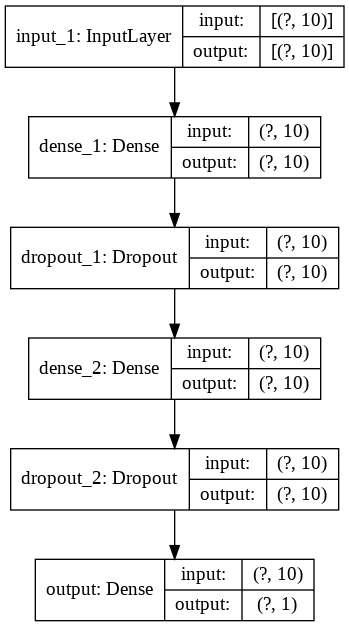

In [24]:
plot_model(model=model, show_shapes=True)

## Funzionale



In [25]:
input_1 = Input(shape=(10,))
input_2 = Input(shape=(20,))

# prima sottorete
x = Dense(100, activation='relu')(input_1)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
# seconda sottorete
y = Dense(100, activation='relu')(input_2)
y = Dense(100, activation='relu')(y)
y = Dense(100, activation='relu')(y)

conc = concatenate([x, y])
out = Dense(1)(conc)

model = Model(inputs=[input_1, input_2], outputs=out)

In [26]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          1100        input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          2100        input_3[0][0]                    
_______________________________________________________________________________________

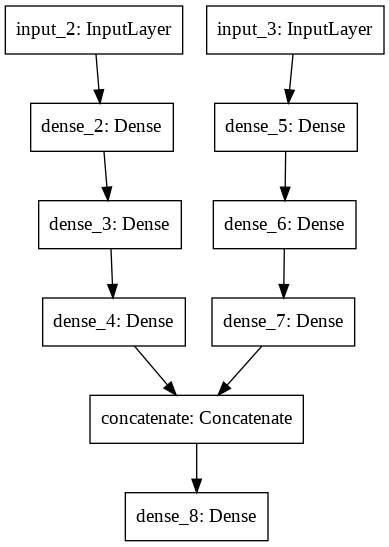

In [27]:
plot_model(model)

## Subclassing

In [28]:
class RegressorMLP(Model):
    def __init__(self, num_hidden_layers, activation, units_x_layer, dropout_rate):
        super().__init__(name='RegressorMLP')
        self.hidden_layers = []
        self.dropouts = []
        for i in range(num_hidden_layers):
            self.hidden_layers.append(Dense(units=units_x_layer, activation=activation, name=f'dense_{i}'))
            self.dropouts.append(Dropout(dropout_rate, name=f'dropout_{i}'))
        self.last_layer = Dense(1, name=f'dense_{num_hidden_layers}')

    def call(self, inputs, training=False):
        x = inputs
        for dense, dropout in zip(self.hidden_layers, self.dropouts):
            print(dense.name, dropout.name)
            x = dense(x)
            x = dropout(x) if training else x

        x = self.last_layer(x)
        
        return x

In [29]:
model = RegressorMLP(num_hidden_layers=4, activation='relu', units_x_layer=50, dropout_rate=0.3)

In [30]:
model(np.random.rand(32, 10).astype(np.float32), training=True)

dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3


<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[ 0.08775848],
       [-0.04170182],
       [ 0.02224907],
       [ 0.05942954],
       [ 0.00834256],
       [-0.07456228],
       [ 0.09417628],
       [-0.01353358],
       [ 0.12460512],
       [-0.35054934],
       [ 0.15235412],
       [-0.05203337],
       [ 0.05784845],
       [ 0.23795557],
       [ 0.15889338],
       [-0.06378404],
       [-0.00530481],
       [ 0.08658307],
       [-0.28640917],
       [ 0.10324706],
       [-0.01945248],
       [ 0.03666259],
       [ 0.11628626],
       [-0.34382117],
       [ 0.22817732],
       [-0.08734155],
       [-0.06185874],
       [ 0.04023578],
       [ 0.03517535],
       [-0.1039864 ],
       [ 0.13962099],
       [ 0.4497452 ]], dtype=float32)>

# Addestramento

In [31]:
# come si addestra un modello

In [32]:
N = 100_000 # num of samples
x = np.random.rand(N, 10)
y = x @ np.array([1, 4, 2, 3, 5, 1, 6, 1, 1, 2]).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
model = Sequential(
    [
     Input(10),
     Dense(10, activation='relu', name='dense_1'),
     Dropout(0.1, name='dropout_1'),
     Dense(10, activation='relu', name='dense_2'),
     Dropout(0.1, name='dropout_2'),
     Dense(1, name='output')
    ]
)

In [34]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

In [35]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 16.1888 - mae: 2.7977 - val_loss: 0.5294 - val_mae: 0.5508
Epoch 2/10
2000/2000 [==============================] - 3s 2ms/step - loss: 5.2566 - mae: 1.7805 - val_loss: 0.2513 - val_mae: 0.3919
Epoch 3/10
2000/2000 [==============================] - 3s 1ms/step - loss: 3.8738 - mae: 1.5232 - val_loss: 0.2541 - val_mae: 0.4018
Epoch 4/10
2000/2000 [==============================] - 3s 1ms/step - loss: 2.7707 - mae: 1.2985 - val_loss: 0.1360 - val_mae: 0.2834
Epoch 5/10
2000/2000 [==============================] - 3s 1ms/step - loss: 2.1393 - mae: 1.1442 - val_loss: 0.0386 - val_mae: 0.1518
Epoch 6/10
2000/2000 [==============================] - 3s 1ms/step - loss: 1.7378 - mae: 1.0267 - val_loss: 0.0741 - val_mae: 0.2277
Epoch 7/10
2000/2000 [==============================] - 2s 1ms/step - loss: 1.3554 - mae: 0.9064 - val_loss: 0.0796 - val_mae: 0.2375
Epoch 8/10
2000/2000 [==============================] - 3s 1m

In [36]:
model.history.history

{'loss': [16.18880844116211,
  5.256614685058594,
  3.8738274574279785,
  2.7706987857818604,
  2.1393380165100098,
  1.7378376722335815,
  1.3554365634918213,
  1.1025484800338745,
  0.897737979888916,
  0.7928013205528259],
 'mae': [2.797677516937256,
  1.7805283069610596,
  1.52317476272583,
  1.2985317707061768,
  1.144230842590332,
  1.026708960533142,
  0.9063861966133118,
  0.8060690760612488,
  0.7206465601921082,
  0.6644364595413208],
 'val_loss': [0.5293583273887634,
  0.251282274723053,
  0.2540544867515564,
  0.1360156536102295,
  0.038572974503040314,
  0.0741460993885994,
  0.07962825149297714,
  0.08322717994451523,
  0.1018725037574768,
  0.10823160409927368],
 'val_mae': [0.5508471727371216,
  0.39185309410095215,
  0.40175536274909973,
  0.28340309858322144,
  0.15182942152023315,
  0.22770635783672333,
  0.23747952282428741,
  0.22584086656570435,
  0.2265765219926834,
  0.1586785614490509]}

In [37]:
model.metrics_names

['loss', 'mae']

In [38]:
loss, mae = model.evaluate(x_test, y_test)
print(f'loss={loss}, mae={mae}')

625/625 [==============================] - 1s 813us/step - loss: 0.1096 - mae: 0.1580
loss=0.10955458134412766, mae=0.1579667180776596


In [39]:
y_hat = model.predict(x_test[:100])
print(y_hat.shape)

(100, 1)


# Salvataggio di un modello

In [40]:
# salvataggio del modello (anche lo stato dell'optimizer)
model.save('checkpoint')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint/assets


In [45]:
model = keras.models.load_model('/content/checkpoint')

In [50]:
# salvataggio dei pesi
model.save_weights('weights/w', save_format='tf')

In [52]:
model.load_weights('weights/w', by_name=False)

# Callbacks

In [53]:
model = RegressorMLP(num_hidden_layers=4, activation='relu', units_x_layer=50, dropout_rate=0.3)

In [64]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

In [65]:
callbacks = [
    CSVLogger('logger.csv'),
    EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True),
    ModelCheckpoint('train/checkpoint')
]

In [63]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=callbacks)

dense_3 dropout_3
1159/2000 [================>.............] - ETA: 23s - loss: 1.1928 - mae: 0.8091dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
1161/2000 [================>.............] - ETA: 23s - loss: 1.1932 - mae: 0.8092dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
1163/2000 [================>.............] - ETA: 23s - loss: 1.1924 - mae: 0.8090dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
1166/2000 [================>.............] - ETA: 23s - loss: 1.1917 - mae: 0.8087dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
dense_0 dropout_0
dense_1 dropout_1
dense_2 dropout_2
dense_3 dropout_3
1168/2

KeyboardInterrupt: ignored